In [ ]:
# - Install/Import relevant libraries and Modules
# - EDA
# - Separate Independent and Dependent Data
# - Split your data into train and test
# - Model Training (Linear Regression)
# - Model Prediction
# - Model Evaluation

# Regression analysis is a statistical method used to estimate the relationships between a dependent variable and one or more independent variables.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

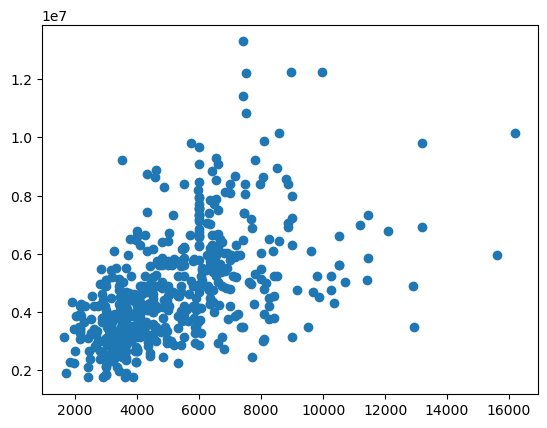

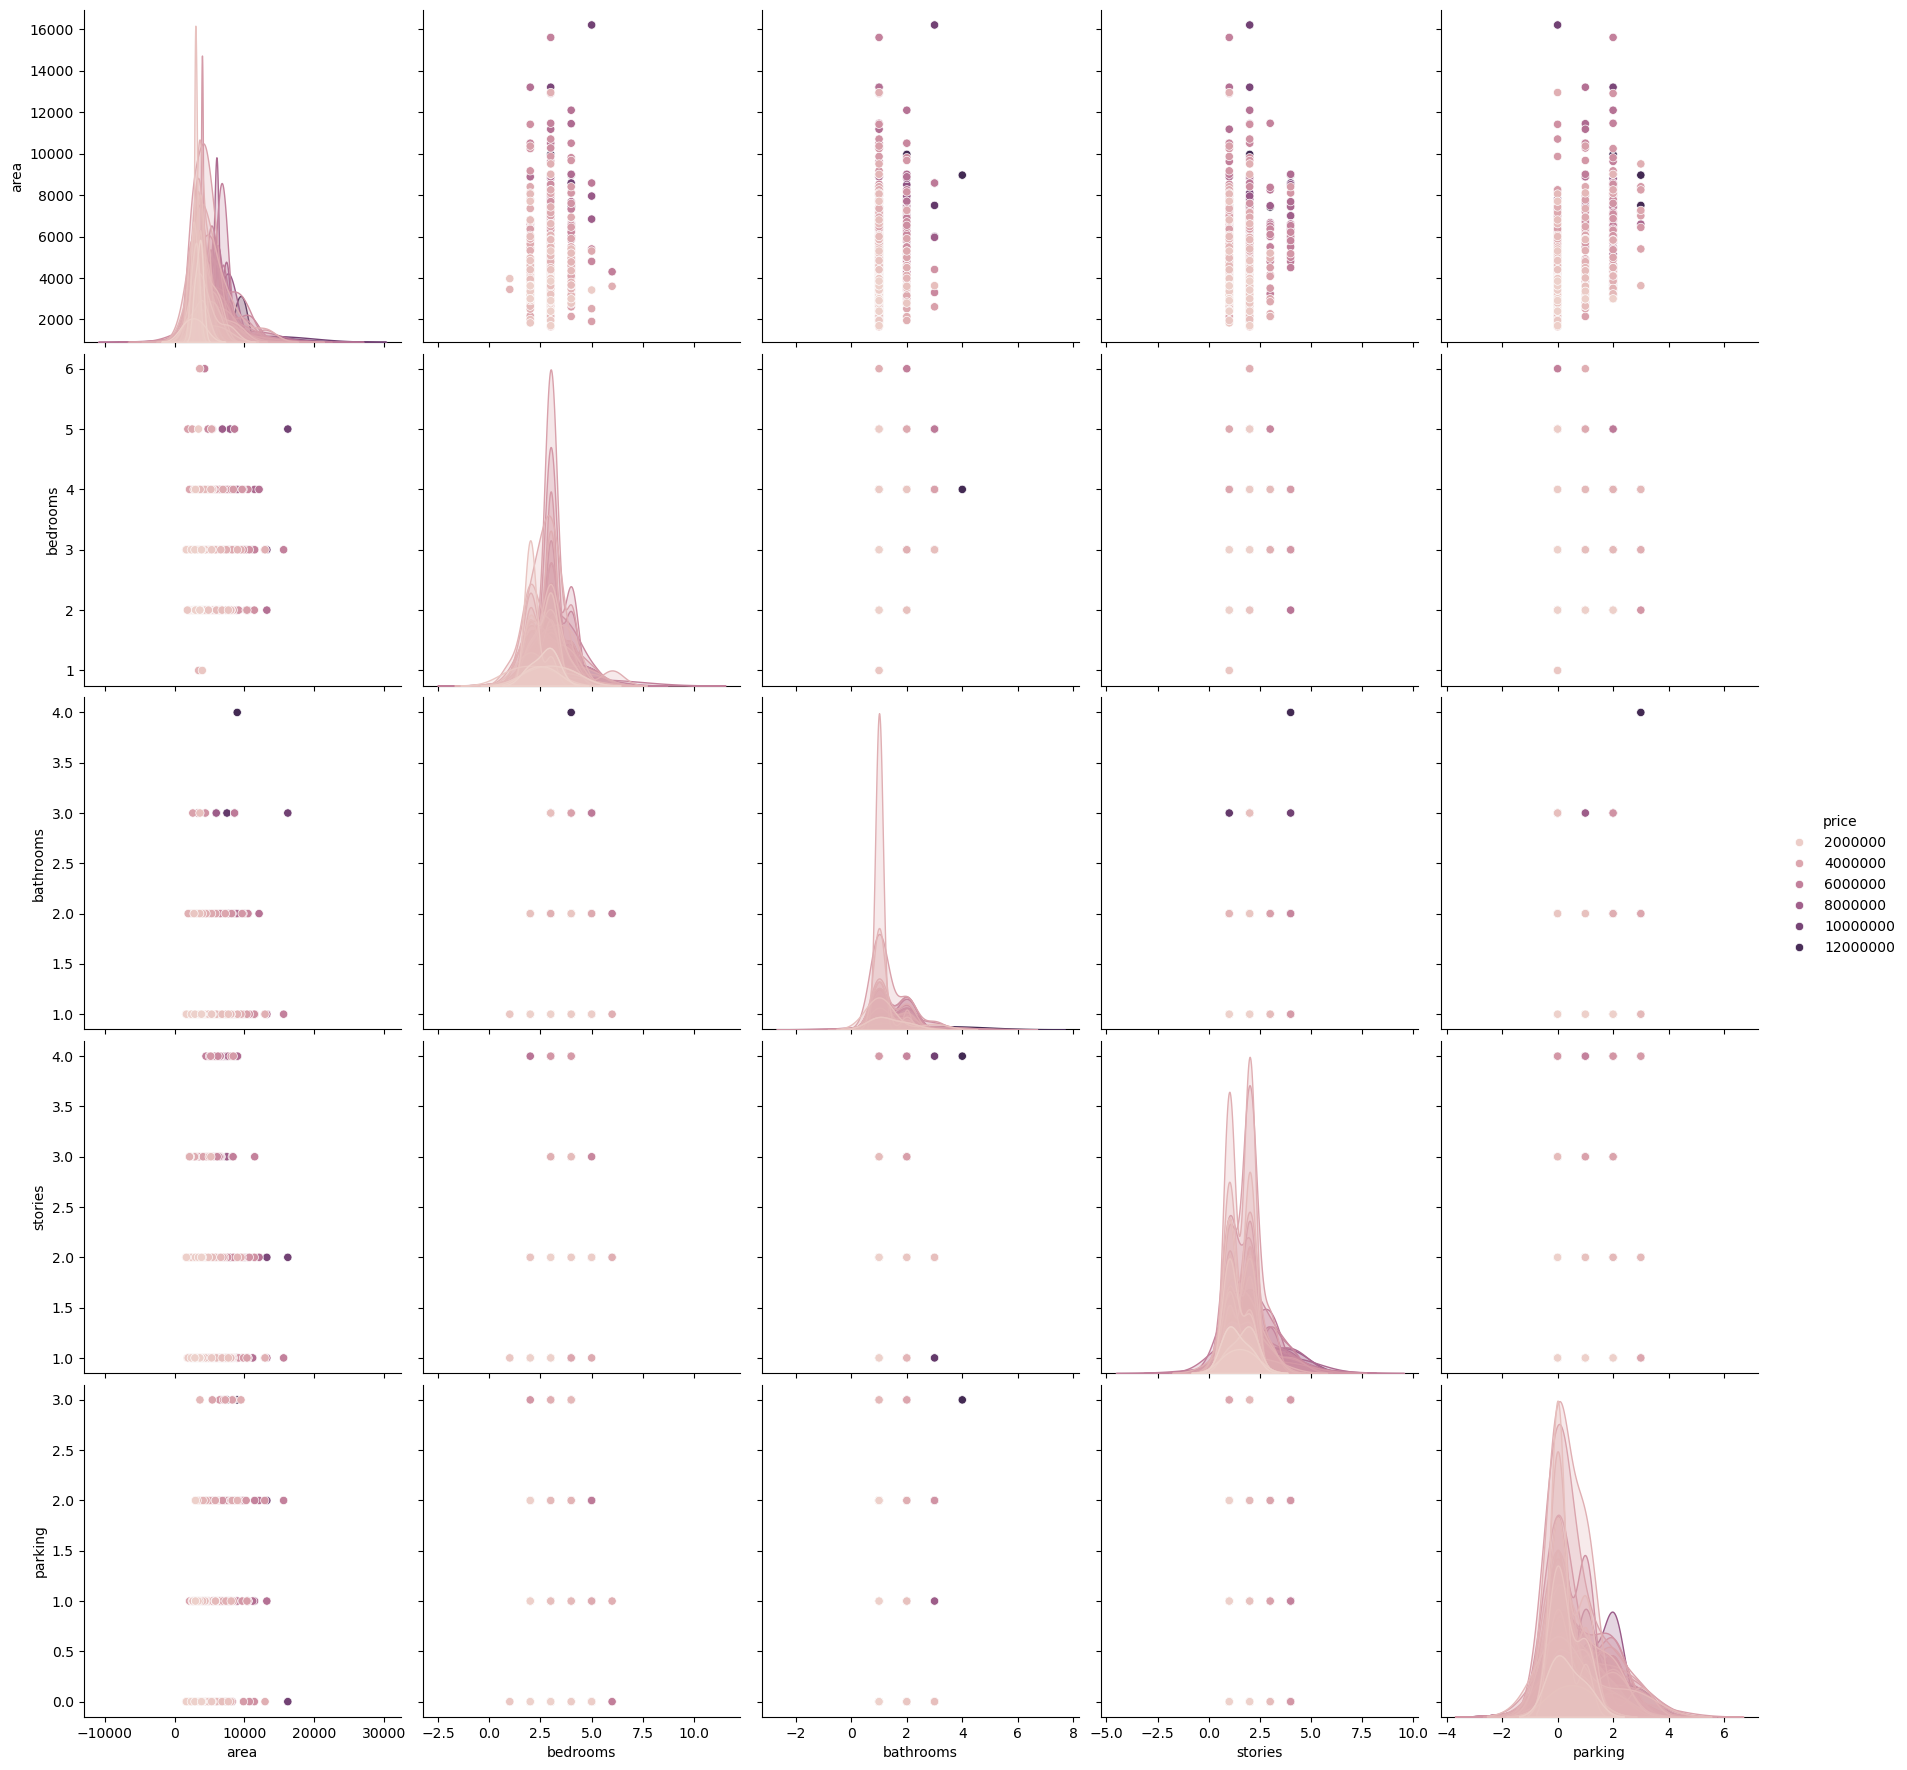

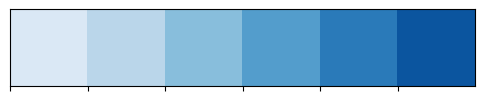

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [13]:
df =pd.read_csv("C:/Users/KIIT/Downloads/Housing.csv") 
print(df)

# Step 1: Perform basic EDA operaton

print(df.info())
print(df.shape)
print(df.describe())
X=df['area']
y=df['price']
print(plt.scatter(X,y))
plt.show()
print(sns.pairplot(df,hue='price',height=3.6))
palette = sns.color_palette('Blues', n_colors=6)
sns.palplot(palette)
plt.show()

print(df.columns)

In [20]:
# Step 2: Separate Independent and Dependent Data
# Method 1:
print("Method 1")
print(f"The independent data is: \n {df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]}")
print(f"The dependent data: \n {df['price']}")

# Method 2:
print("Method 2")
print(f"The independent data is: \n {df.iloc[: ,1:]}")
print(f"The dependent data is: \n {df.iloc[:,:1]}")

# Method 3:
print("Method 3")
print(f"The independent data is: \n {df.drop(columns='price',axis=1)}")
print(f"The dependent data is: \n {df.iloc[:,:1]}")

Method 1
The independent data is: 
      area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes   

In [33]:
# Step 3: Split your data into train and test
# Split your data into train and test

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

46     6000
93     7200
335    3816
412    2610
471    3750
       ... 
71     6000
106    5450
270    4500
435    4040
102    5500
Name: area, Length: 436, dtype: int64
316    5900
77     6500
360    4040
90     5000
493    3960
       ... 
15     6000
357    6930
39     6000
54     6000
155    6100
Name: area, Length: 109, dtype: int64
46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 436, dtype: int64
316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64
(436,)
(109,)
(436,)
(109,)


In [ ]:
lr=LinearRegression() 
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
print(lr.fit(X_train,y_train))
print(lr.coef_)
coef_df = pd.DataFrame({'Coefficient/Weight': lr.coef_}, index=['area'])
print(coef_df)



LinearRegression()
[425.72984194]
      Coefficient/Weight
area          425.729842


In [7]:
# Step 4: Model Prediction

y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)
print(X_train[:3])
print(y_pred_train[:3])
print(X_test)
print(y_test)
print(y_pred_test[:3])

[[6000]
 [7200]
 [3816]]
[5066633.31559204 5577509.12591858 4136839.34079774]
[[ 5900]
 [ 6500]
 [ 4040]
 [ 5000]
 [ 3960]
 [ 6720]
 [ 8520]
 [ 4990]
 [ 3240]
 [ 2700]
 [ 8580]
 [ 3934]
 [ 3720]
 [ 3100]
 [ 3970]
 [ 3630]
 [ 2000]
 [ 6000]
 [ 5850]
 [ 6000]
 [ 5020]
 [ 6825]
 [ 3649]
 [ 3800]
 [ 8250]
 [ 9960]
 [ 3090]
 [ 3000]
 [13200]
 [ 3000]
 [ 4000]
 [ 3120]
 [ 6000]
 [ 6615]
 [ 4775]
 [ 4600]
 [ 4646]
 [ 3180]
 [ 3480]
 [ 2787]
 [ 7980]
 [ 3630]
 [ 6420]
 [ 4200]
 [ 6750]
 [ 5885]
 [ 6000]
 [ 4640]
 [ 8050]
 [ 3000]
 [ 7475]
 [ 3000]
 [ 7770]
 [ 4500]
 [ 3640]
 [ 2910]
 [ 5750]
 [ 2400]
 [ 6450]
 [ 3800]
 [ 3180]
 [ 2135]
 [ 6440]
 [ 4960]
 [ 5360]
 [ 3760]
 [ 6600]
 [ 3000]
 [ 8400]
 [ 5700]
 [ 2850]
 [ 6360]
 [ 8400]
 [10500]
 [ 2684]
 [ 4260]
 [ 3630]
 [ 4815]
 [ 6000]
 [ 5300]
 [ 6360]
 [ 4080]
 [ 5500]
 [ 6670]
 [ 1700]
 [ 5960]
 [ 2800]
 [ 3450]
 [ 7420]
 [ 6000]
 [ 1905]
 [ 8050]
 [ 5450]
 [ 3410]
 [ 8580]
 [ 3700]
 [ 5828]
 [ 5800]
 [ 5500]
 [ 6600]
 [ 3240]
 [ 4600]
 [ 2

MSE : 2204738681379.341
RMSE : 1484836.2473280819
MAE : 1092585.5897087941
R2 Score : 0.2849633094647923


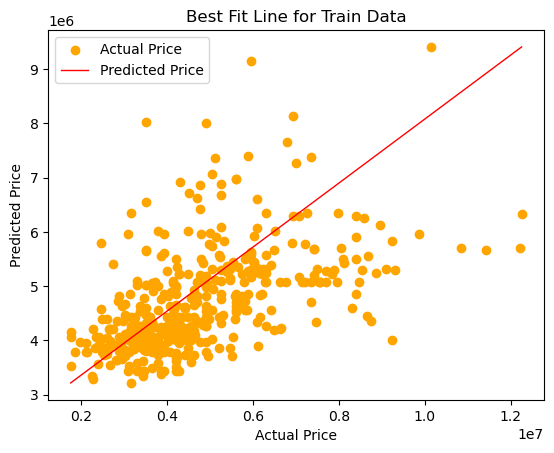

In [ ]:
# Step 5: Training Evaluation

def training_evaluation(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print(f'MSE : {mse}')
    print(f'RMSE : {rmse}')
    print(f'MAE : {mae}')
    print(f'R2 Score : {r2}')

training_evaluation(y_train,y_pred_train)
plt.scatter(y_train, y_pred_train, color='orange', label='Actual Price')
plt.plot([y_train.min(), y_train.max()], [y_pred_train.min(), y_pred_train.max()], lw=1, color='red', label='Predicted Price')
plt.title('Best Fit Line for Train Data')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

